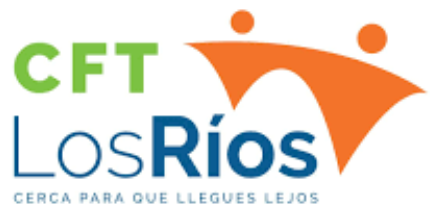
# Redes Neuronales Convolucionales
### Analisis del dataset Cifar10
#### Profesor: Diego Miranda Olavarria
##### Data Scientist

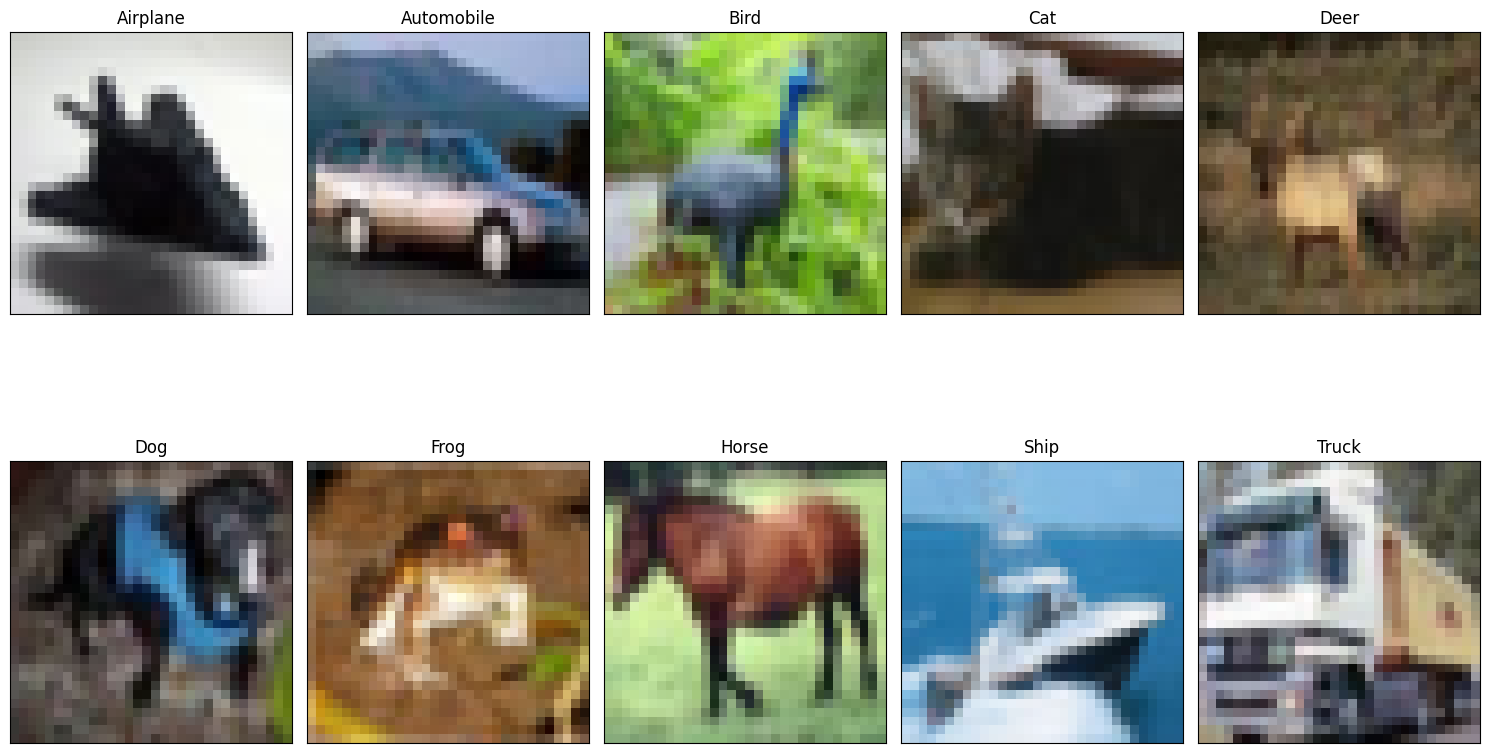

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para visualizar una imagen por clase
# Requiere: dataset de imágenes (x), etiquetas (y), y nombres de clases opcionales

def visualize_classes(x_data, y_data, class_names=None):
    unique_classes = np.unique(y_data)
    class_images = []

    for class_label in unique_classes:
        index = np.where(y_data == class_label)[0][0]  # Obtener el índice de la primera aparición de la clase
        class_images.append((x_data[index], class_label))

    # Crear nombres de clases genéricos si no se proporcionan
    if class_names is None:
        class_names = [f"Class {int(cls)}" for cls in unique_classes]

    # Visualizar las imágenes
    plt.figure(figsize=(15, 10))  # Aumentar el tamaño de la figura
    for i, (image, label) in enumerate(class_images):
        plt.subplot(2, 5, i + 1)  # Ajustar a 2 filas y 5 columnas para mejor visibilidad
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.title(class_names[int(label)], fontsize=12)  # Mostrar el nombre de la clase

    plt.tight_layout()
    plt.show()

# Ejemplo de uso genérico
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (_, _) = cifar10.load_data()
class_names_cifar10 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
visualize_classes(x_train, y_train, class_names=class_names_cifar10)

In [2]:
import numpy as np
from collections import Counter
from tensorflow.keras.datasets import cifar10

# Función para contar el número de imágenes por clase
def count_images_per_class(y_data, class_names=None):
    class_counts = Counter(y_data.flatten())  # Contar la cantidad de ocurrencias por clase

    if class_names is None:
        class_names = [f"Class {cls}" for cls in sorted(class_counts.keys())]

    print("Imágenes por clase:")
    for cls, count in sorted(class_counts.items()):
        class_name = class_names[cls] if cls < len(class_names) else f"Class {cls}"
        print(f"{class_name}: {count} imágenes")

# Cargar el dataset CIFAR-10
(_, y_train), (_, _) = cifar10.load_data()
class_names_cifar10 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Contar las imágenes por clase
count_images_per_class(y_train, class_names=class_names_cifar10)


Imágenes por clase:
Airplane: 5000 imágenes
Automobile: 5000 imágenes
Bird: 5000 imágenes
Cat: 5000 imágenes
Deer: 5000 imágenes
Dog: 5000 imágenes
Frog: 5000 imágenes
Horse: 5000 imágenes
Ship: 5000 imágenes
Truck: 5000 imágenes


In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Función para obtener las dimensiones y la profundidad de bits de las imágenes
def check_image_properties(x_data):
    print(f"Número de imágenes: {x_data.shape[0]}")
    print(f"Dimensiones de las imágenes: {x_data.shape[1]}x{x_data.shape[2]}")
    print(f"Número de canales: {x_data.shape[3] if len(x_data.shape) == 4 else 1}")
    
    # Comprobar la profundidad de bits
    bit_depth = np.log2(np.max(x_data) + 1)
    print(f"Profundidad de bits: {int(bit_depth)} bits")

# Cargar el dataset CIFAR-10
(x_train, _), (_, _) = cifar10.load_data()

# Comprobar las propiedades de las imágenes
check_image_properties(x_train)


Número de imágenes: 50000
Dimensiones de las imágenes: 32x32
Número de canales: 3
Profundidad de bits: 8 bits


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.datasets import cifar10

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los valores de píxel entre 0 y 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a formato one-hot encoding
num_classes = 10  # CIFAR-10 tiene 10 clases
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=RMSprop(learning_rate=0.001, decay=1e-6),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
batch_size = 64  # Ajuste del tamaño de lote para mejorar el rendimiento
epochs = 50

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Loss en test: {test_loss}, Accuracy en test: {test_accuracy}")




Epoch 1/50


782/782 [==============================] - 17s 21ms/step - loss: 1.5821 - accuracy: 0.4293 - val_loss: 1.1579 - val_accuracy: 0.5849
Epoch 2/50
782/782 [==============================] - 16s 21ms/step - loss: 1.1404 - accuracy: 0.6019 - val_loss: 1.0682 - val_accuracy: 0.6251
Epoch 3/50
559/782 [====================>.........] - ETA: 4s - loss: 0.9783 - accuracy: 0.6591